<a id="2"></a> 
# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
import multiprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
nltk.download("stopwords")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="3"></a> 
# 2. Loading the Data

In [3]:
# setting the names of the columns into col_names

col_names = ["target", "ids", "date", "flag", "user", "text"]
# reading the data from the path and using ISO-8859-1 encoding to decode it.

df = pd.read_csv(r'C:\Users\rosin\OneDrive\Desktop\New folder (4)\data.csv',
            encoding = "ISO-8859-1",
            names=col_names)

In [4]:
df = df.sample(160000) # taking 160k rows from the data
df.head()

,target,ids,date,flag,user,text
1065590,4,1964969545,Fri May 29 15:06:37 PDT 2009,NO_QUERY,i_like_limes,@juliesauce why thank you
395240,0,2055902835,Sat Jun 06 10:09:52 PDT 2009,NO_QUERY,Gabuki,ow ow ow. my stomach's hurting
435575,0,2065458470,Sun Jun 07 08:38:16 PDT 2009,NO_QUERY,adrigirl,"Enjoying my Sunday morning, although its almos..."
271834,0,1990089175,Mon Jun 01 03:50:39 PDT 2009,NO_QUERY,pascal1982,where is that plane of air france???
858041,4,1574064694,Tue Apr 21 04:06:09 PDT 2009,NO_QUERY,elainebenter,"oh, i got followers! awesome"


<a id="4"></a> 
# 3. Let's Explore the Data

In [5]:
df.info() # shows the columns, and their types.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 1065590 to 1526827
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  160000 non-null  int64 
 1   ids     160000 non-null  int64 
 2   date    160000 non-null  object
 3   flag    160000 non-null  object
 4   user    160000 non-null  object
 5   text    160000 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.5+ MB


In [6]:
df.shape

(160000, 6)

In [7]:
df.describe(include='all') # To statistical measures of the columns

,target,ids,date,flag,user,text
count,160000.000000,1.600000e+05,160000,160000,160000,160000
unique,NaN,NaN,143706,1,123555,159380
top,NaN,NaN,Tue Jun 02 13:46:43 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,6,160000,52,25
mean,1.994300,1.999127e+09,NaN,NaN,NaN,NaN
std,1.999998,1.933825e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467812e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.957033e+09,NaN,NaN,NaN,NaN
50%,0.000000,2.002255e+09,NaN,NaN,NaN,NaN
75%,4.000000,2.177081e+09,NaN,NaN,NaN,NaN


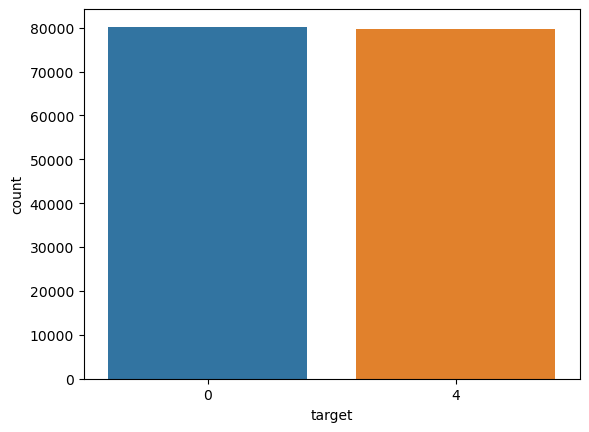

In [8]:
sns.countplot(x=df['target']); # shows a count plot refering to the number of 0 and 4 in the column

In [9]:
df = df.drop(['ids', 'date', 'flag','user'], axis = 1) # dropping unnecessary columns

In [10]:
df.head()

,target,text
1065590,4,@juliesauce why thank you
395240,0,ow ow ow. my stomach's hurting
435575,0,"Enjoying my Sunday morning, although its almos..."
271834,0,where is that plane of air france???
858041,4,"oh, i got followers! awesome"


<a id="5"></a> 
# 4. Preprocessing

Here 0 represents as negative and 4 as positive so lets change 4 to 1.

In [11]:
df['target']=df['target'].replace(4,1) 

In [12]:
data = df['text']
labels = np.array(df['target'])

In [13]:
data.iloc[1] # displaying a row of the data

"ow ow ow. my stomach's hurting "

### 4.B. Stopwords removal

In [14]:
# this function is copied from another kernel. Don't know who is the original author of it.
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

#Removing the stopwords from text
def split_into_words(text):
    # split into words by white space
    words = text.split()
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    # remove remaining tokens that are not alphabetic
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    # join words to a sentence
    return ' '.join(words)
def tweet(words):
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True,reduce_len=True)
    tweet = tweet_tokenizer.tokenize(words)
    return tweet
        

#Removing the noisy text
def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)

In [17]:
data = data.apply(denoise_text)

To see the difference in before and after applying stopwords function.

In [18]:
print('Before: {}'. format(list(df['text'][:2])))
print('---')
print('After: {}'. format(list(data[:2])))

Before: ['@juliesauce why thank you ', "ow ow ow. my stomach's hurting "]
---
After: ['juliesauce thank', 'ow ow ow stomachs hurting']


In [19]:
print(f"dataset contains {len(data)} examples\n")

print(f"Text of second example should look like this:  {data.iloc[1]}\n")
print(f"Text of fourth example should look like this:  {data.iloc[3]}")

print(f"\nLabels of last 5 examples should look like this:\n{labels[-5:]}")

dataset contains 160000 examples

Text of second example should look like this:  ow ow ow stomachs hurting

Text of fourth example should look like this:  plane air france

Labels of last 5 examples should look like this:
[1 1 0 0 1]


# 4.C. Splitting the Data 

In [20]:
# Split in training validation and test sets
X_train, X_test, y_train, y_test = test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=1,
                                                           stratify = labels)

<a id="6"></a> 
# 5. TOKENIZER 

In [21]:
# lets take 10k words in num_words
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

116346

In [22]:
maxlen = max([len(x) for x in X_train]) # return 175 which is too big for tweets data.
maxlen = 50

### 5.B. Sequencing and Padding

In [23]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [24]:
len(train_padded_sequences[0])

50

<a id="7"></a> 
# 5. Data Modeling 

In [28]:
embedding_dim = 32

In [34]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(embedding_dim,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [33]:
#summary of the model.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (32, 50, 32)                │       3,723,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (32, 32)                    │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 32)                    │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (32, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (32, 32)                    │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (32, 32)                    │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (32, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 8)                     │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 1)                     │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,192,629 (42.70 MB)

 Trainable params: 3,730,833 (14.23 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 7,461,668 (28.46 MB)

In [31]:
# Training the model we created above. 
history =    model.fit(train_padded_sequences,
                                               y_train,
                                               validation_data = (test_padded_sequences, y_test),
                                               epochs = 3)

Epoch 1/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 120s 29ms/step - accuracy: 0.6840 - loss: 0.5890 - val_accuracy: 0.5875 - val_loss: 0.6772
Epoch 2/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 115s 29ms/step - accuracy: 0.7745 - loss: 0.4779 - val_accuracy: 0.7686 - val_loss: 0.4796
Epoch 3/3
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 116s 29ms/step - accuracy: 0.7938 - loss: 0.4450 - val_accuracy: 0.7630 - val_loss: 0.4858


In [35]:
print(X_test.iloc[99],'label: ;',y_test[99])

sitting sister enjoying guiness label: ; 1


In [36]:
tokenizer.sequences_to_texts(test_padded_sequences)[99]

'sitting sister enjoying <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>'

In [37]:
model.predict(test_padded_sequences)[99]

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


array([0.49627855], dtype=float32)

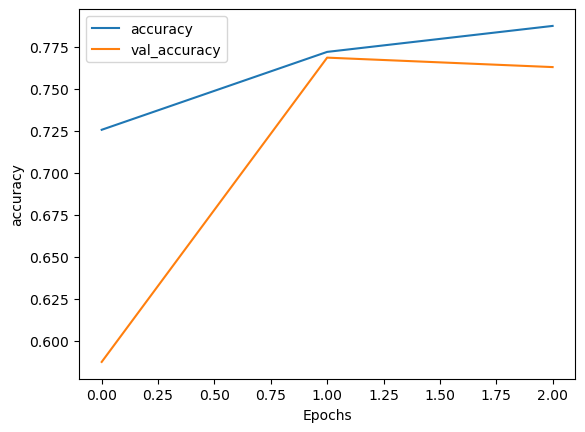

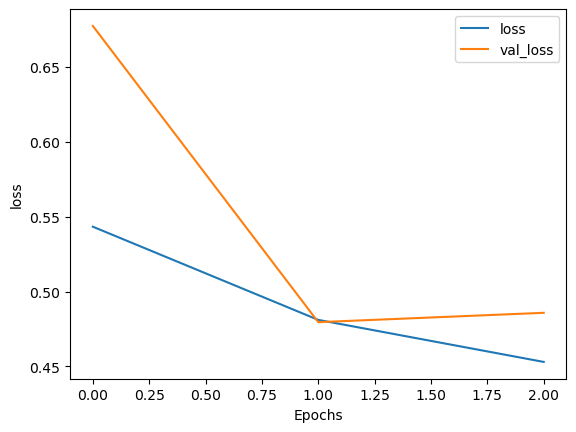

In [38]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
  plt.plot(model.history[string])
  plt.plot(model.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [39]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.7875
Final Validation Accuracy: 0.7630
